In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
try:
    sales_data = pd.read_csv('../dataset/sales_data.csv', encoding='latin1')
except UnicodeDecodeError:
    sales_data = pd.read_csv('../dataset/sales_data.csv', encoding='ISO-8859-1')

In [29]:
sales_data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [13]:
# Check for missing values
print(sales_data.isnull().sum())

# Drop rows with missing values, except for the second address line as it is optional
columns_to_check = sales_data.columns.difference(['ADDRESSLINE2','TERRITORY'])
sales_data = sales_data.dropna(subset=columns_to_check)

ORDERNUMBER           0
QUANTITYORDERED       0
PRICEEACH             0
ORDERLINENUMBER       0
SALES                 0
ORDERDATE             0
STATUS                0
QTR_ID                0
MONTH_ID              0
YEAR_ID               0
PRODUCTLINE           0
MSRP                  0
PRODUCTCODE           0
CUSTOMERNAME          0
PHONE                 0
ADDRESSLINE1          0
ADDRESSLINE2        116
CITY                  0
STATE                 0
POSTALCODE            0
COUNTRY               0
TERRITORY             0
CONTACTLASTNAME       0
CONTACTFIRSTNAME      0
DEALSIZE              0
dtype: int64
ORDERNUMBER           0
QUANTITYORDERED       0
PRICEEACH             0
ORDERLINENUMBER       0
SALES                 0
ORDERDATE             0
STATUS                0
QTR_ID                0
MONTH_ID              0
YEAR_ID               0
PRODUCTLINE           0
MSRP                  0
PRODUCTCODE           0
CUSTOMERNAME          0
PHONE                 0
ADDRESSLINE1          0
ADD

In [39]:
# convert columns to adequate datatypes
sales_data['ORDERDATE'] = pd.to_datetime(sales_data['ORDERDATE'], errors='coerce')
sales_data.dropna(subset=['ORDERDATE'], inplace=True)

In [40]:
# DEBUG: Check columns and their types
print(list(sales_data.columns))
print(sales_data.columns.to_series().groupby(sales_data.dtypes).groups)

['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE', 'YEAR', 'MONTH']
{int64: ['ORDERNUMBER', 'QUANTITYORDERED', 'ORDERLINENUMBER', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP'], float64: ['PRICEEACH', 'SALES'], datetime64[ns]: ['ORDERDATE'], int32: ['YEAR', 'MONTH'], object: ['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']}


In [41]:
# aggregate sales monthly sales data
monthly_sales = sales_data.groupby(['YEAR_ID', 'MONTH_ID']).agg({'SALES': 'sum', 'QUANTITYORDERED': 'sum'}).reset_index()
monthly_sales

,YEAR_ID,MONTH_ID,SALES,QUANTITYORDERED
0,2003,1,129753.60,1357
1,2003,2,140836.19,1449
2,2003,3,174504.90,1755
3,2003,4,201609.55,1993
4,2003,5,192673.11,2017
5,2003,6,168082.56,1649
6,2003,7,187731.88,1725
7,2003,8,197809.30,1974
8,2003,9,263973.36,2510
9,2003,10,568290.97,5515


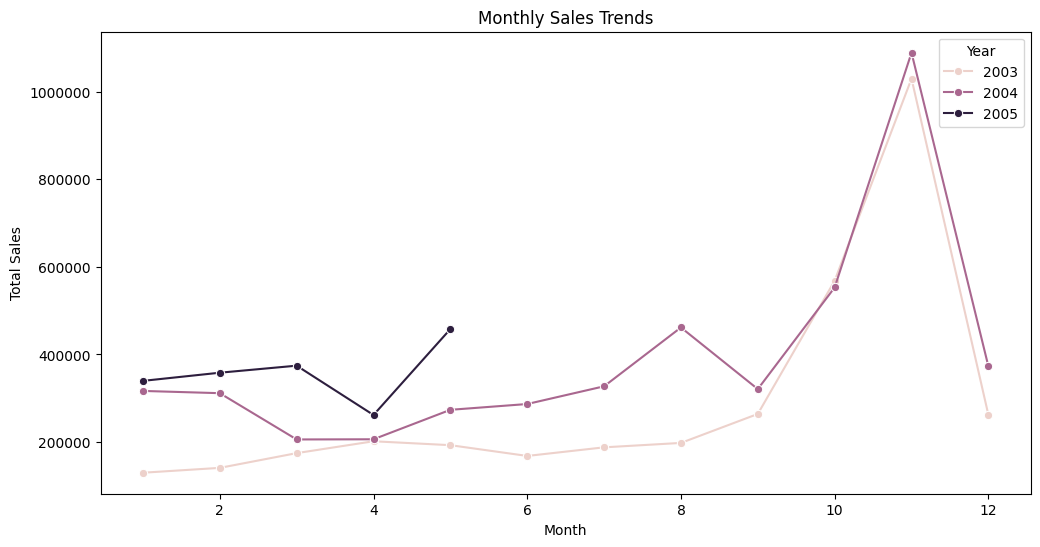

In [43]:
from matplotlib.ticker import FuncFormatter
# Define a formatter function to display full values
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0f' % x

formatter = FuncFormatter(millions)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='MONTH_ID', y='SALES', hue='YEAR_ID', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')

plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


In [37]:
product_sales = sales_data.groupby('PRODUCTCODE').agg({'SALES': 'sum'}).reset_index()

/var/folders/pk/bh1mjlls115_230f582d_s5m0000gn/T/ipykernel_65598/452168394.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='SALES', y='PRODUCTCODE', palette='viridis')


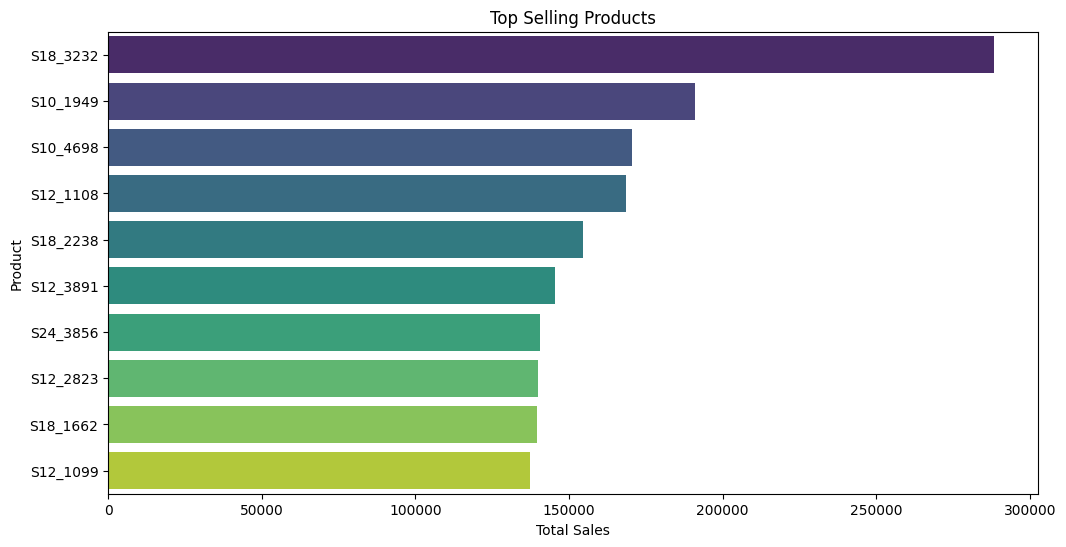

In [38]:
# Plot top-selling products
top_products = product_sales.sort_values(by='SALES', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='SALES', y='PRODUCTCODE', palette='viridis')
plt.title('Top Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

In [ ]:
# monthly_sales = 
# product_sales = 